Enter the `correlation_id` you're interested in, and also the HUMIO Repo between `sb-demo`for DEMO and `sb-production` for PROD.

In [1]:
correlation_id = "33f9301e43744d56f34cebc74690fc4d" # @param {"type":"string"}
repo = "sb-demo" # @param ["sb-demo","sb-production"]
start = "2d" # @param ["3h","12h","1d","7d","30d"]

# Graph generation

In [2]:
from log_to_graph.humio import query_logs
from dotenv import load_dotenv
import os

load_dotenv()
user_token = str(os.getenv("HUMIO_TOKEN"))

event_map = query_logs(
    user_token,
    repo,
    start,
    correlation_id
)
correlation_id_list = list(event_map.keys())

In [3]:
%load_ext autoreload
%autoreload 2

from log_to_graph.flowchart import node_factory, FlowChart, LIGHT_THEME, UNICORN_THEME, HOTDOG_THEME, VAPORWAVE_THEME, GAMEBOY_THEME, OCEANIC_THEME, MATRIX_THEME, AUTUMN_LEAVES_THEME, CYBERPUNK_THEME, RAINBOW_THEME, SOLARIZED_THEME

for correlation_id in correlation_id_list:
    FlowChart(
        correlation_id, 
        list(map(lambda x: node_factory(x), event_map[correlation_id])),
        theme=LIGHT_THEME,
    ).to_graphviz().unflatten().render(f'./output/{correlation_id}')

# Result

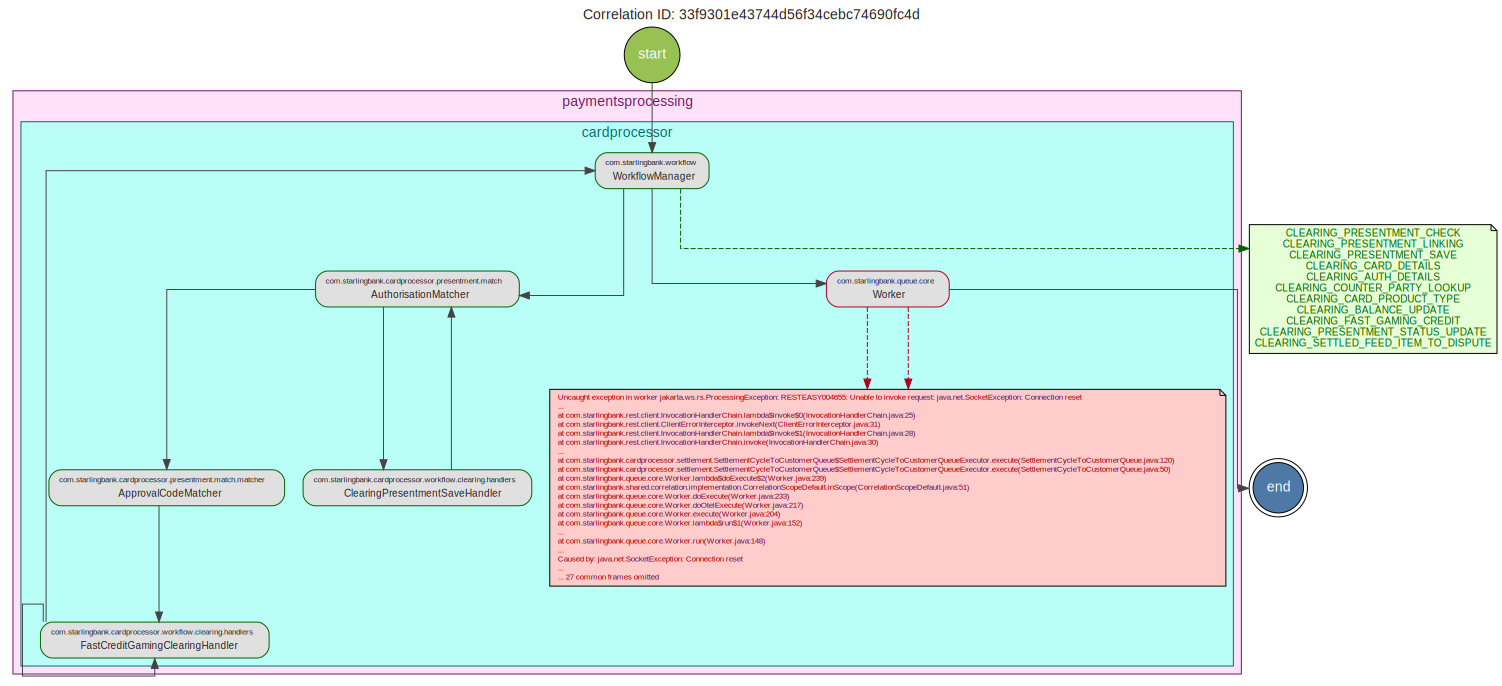

In [4]:
from IPython.display import SVG

for correlation_id in correlation_id_list:
  display(SVG(f'./output/{correlation_id}.svg'))